In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf



In [2]:
import pathlib
dataset_url="https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
data_dir = tf.keras.utils.get_file('horse-or-human', origin=dataset_url, untar=True)

In [3]:
data_dir

'C:\\Users\\nehac\\.keras\\datasets\\horse-or-human'

In [4]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human')

In [5]:
os.listdir('C:/Users/nehac/.keras/datasets/horse-or-human')

['horses', 'humans']

In [6]:
os.listdir('C:/Users/nehac/.keras/datasets/horse-or-human/horses')

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png',
 'horse01-5.png',
 'horse01-6.png',
 'horse01-7.png',
 'horse01-8.png',
 'horse01-9.png',
 'horse02-0.png',
 'horse02-1.png',
 'horse02-2.png',
 'horse02-3.png',
 'horse02-4.png',
 'horse02-5.png',
 'horse02-6.png',
 'horse02-7.png',
 'horse02-8.png',
 'horse02-9.png',
 'horse03-0.png',
 'horse03-1.png',
 'horse03-2.png',
 'horse03-3.png',
 'horse03-4.png',
 'horse03-5.png',
 'horse03-6.png',
 'horse03-7.png',
 'horse03-8.png',
 'horse03-9.png',
 'horse04-0.png',
 'horse04-1.png',
 'horse04-2.png',
 'horse04-3.png',
 'horse04-4.png',
 'horse04-5.png',
 'horse04-6.png',
 'horse04-7.png',
 'horse04-8.png',
 'horse04-9.png',
 'horse05-0.png',
 'horse05-1.png',
 'horse05-2.png',
 'horse05-3.png',
 'horse05-4.png',
 'horse05-5.png',
 'horse05-6.png',
 'horse05-7.png',
 'horse05-8.png',
 'horse05-9.png',
 'horse06-0.png',
 'horse06-1.png',
 'horse06-2.png',
 'horse06-3.png',
 'horse06-4.png',
 'horse06-

In [7]:
os.listdir('C:/Users/nehac/.keras/datasets/horse-or-human/humans')

['human01-00.png',
 'human01-01.png',
 'human01-02.png',
 'human01-03.png',
 'human01-04.png',
 'human01-05.png',
 'human01-06.png',
 'human01-07.png',
 'human01-08.png',
 'human01-09.png',
 'human01-10.png',
 'human01-11.png',
 'human01-12.png',
 'human01-13.png',
 'human01-14.png',
 'human01-15.png',
 'human01-16.png',
 'human01-17.png',
 'human01-18.png',
 'human01-19.png',
 'human01-20.png',
 'human01-21.png',
 'human01-22.png',
 'human01-23.png',
 'human01-24.png',
 'human01-25.png',
 'human01-26.png',
 'human01-27.png',
 'human01-28.png',
 'human01-29.png',
 'human01-30.png',
 'human02-00.png',
 'human02-01.png',
 'human02-02.png',
 'human02-03.png',
 'human02-04.png',
 'human02-05.png',
 'human02-06.png',
 'human02-07.png',
 'human02-08.png',
 'human02-09.png',
 'human02-10.png',
 'human02-11.png',
 'human02-12.png',
 'human02-13.png',
 'human02-14.png',
 'human02-15.png',
 'human02-16.png',
 'human02-17.png',
 'human02-18.png',
 'human02-19.png',
 'human02-20.png',
 'human02-21

In [8]:
len(os.listdir('C:/Users/nehac/.keras/datasets/horse-or-human/horses'))

500

In [9]:
len(os.listdir('C:/Users/nehac/.keras/datasets/horse-or-human/humans'))

527

In [10]:
print('horses', len(os.listdir('C:/Users/nehac/.keras/datasets/horse-or-human/horses/')))
print('humans', len(os.listdir('C:/Users/nehac/.keras/datasets/horse-or-human/humans/')))

horses 500
humans 527


In [11]:
len(os.listdir('C:/Users/nehac/.keras/datasets/horse-or-human/humans'))+len(os.listdir('C:/Users/nehac/.keras/datasets/horse-or-human/horses'))

1027

In [12]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,array_to_img,img_to_array
from keras.models import Sequential
from glob import glob   #to handle folder/Directory

In [13]:
image_count = len(list(data_dir.glob('*/*.PNG')))
print(image_count)

1027


In [14]:
data_dir

WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human')

In [15]:
list(data_dir.glob('*'))

[WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/humans')]

In [16]:
list(data_dir.glob('horses'))

[WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses')]

In [17]:
list(data_dir.glob('horses/*'))

[WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-0.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-1.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-2.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-3.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-4.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-5.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-6.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-7.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-8.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-9.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse02-0.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse02-1

In [18]:
list(data_dir.glob('*/*'))

[WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-0.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-1.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-2.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-3.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-4.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-5.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-6.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-7.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-8.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-9.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse02-0.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse02-1

In [19]:
len(list(data_dir.glob('*/*')))

1027

In [20]:
horses_count = len(list(data_dir.glob('horses/*.PNG')))
print(horses_count)

500


In [21]:
humans_count = len(list(data_dir.glob('humans/*.PNG')))
print(humans_count)

527


In [22]:
list(data_dir.glob('humans'))

[WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/humans')]

In [23]:
horses = list(data_dir.glob('horses/*.PNG'))
horses

[WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-0.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-1.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-2.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-3.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-4.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-5.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-6.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-7.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-8.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse01-9.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse02-0.png'),
 WindowsPath('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse02-1

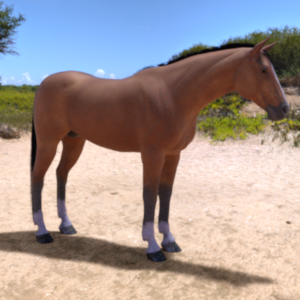

In [24]:
load_img('C:/Users/nehac/.keras/datasets/horse-or-human/horses/horse02-8.png')

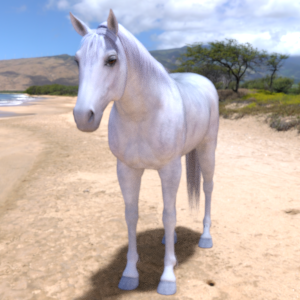

In [25]:
PIL.Image.open(str(horses[0]))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [27]:
batch_size = 50
epochs = 100
IMG_HIEGHT = 300
IMG_WIDHT = 300

In [28]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [29]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 822 images belonging to 2 classes.


In [30]:
train_data_gen.class_indices

{'horses': 0, 'humans': 1}

In [31]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [32]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 205 images belonging to 2 classes.


In [33]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [34]:
sample_img,labels = next(train_data_gen)

In [35]:
sample_img.shape

(50, 300, 300, 3)

In [36]:
labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

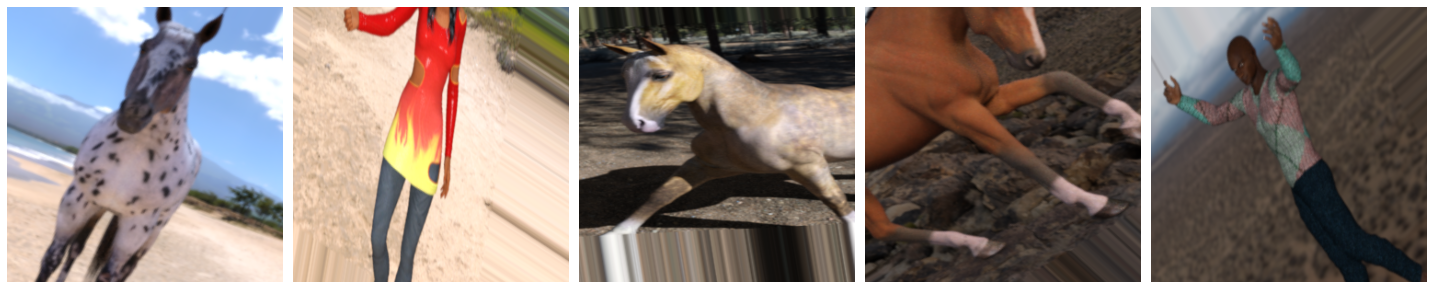

In [37]:
plotImages(sample_img[0:5])

In [38]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.summary()
     

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        1

In [39]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
filepath = 'my_best_horses_vs_humans.h5'

In [41]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

In [42]:
callbacks = [checkpoint]

In [43]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=epochs,callbacks=callbacks)

Epoch 1/100
17/17 [==============================] - 50s 3s/step - loss: 3.0838 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69322, saving model to my_best_horses_vs_humans.h5
Epoch 2/100
17/17 [==============================] - 54s 3s/step - loss: 0.7001 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00002: val_loss improved from 0.69322 to 0.69319, saving model to my_best_horses_vs_humans.h5
Epoch 3/100
17/17 [==============================] - 57s 3s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.69319
Epoch 4/100
17/17 [==============================] - 58s 3s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00004: val_loss improved from 0.69319 to 0.69318, saving model to my_best_horses_vs_humans.h5
Epoch 5/100
17/17 [==============================] - 61s 4s/step - loss: 0.6932 - acc

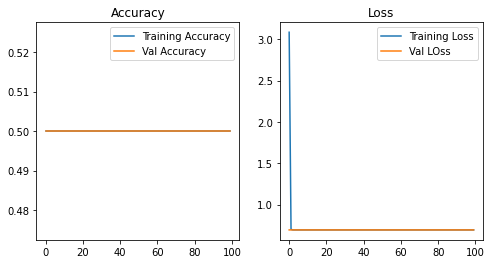

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc=0)
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()

In [48]:
model = tf.keras.models.load_model('my_best_horses_vs_humans.h5')

In [66]:
img = load_img('human1.png',target_size=(300,300))

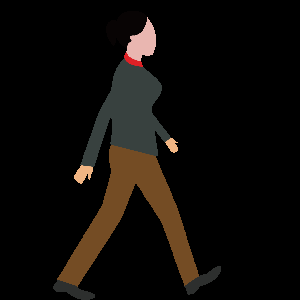

In [67]:
img

In [68]:
img_array = img_to_array(img)

In [69]:
img_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [70]:
img_array.shape

(300, 300, 3)

In [71]:
img_array = img_array.reshape(1,300, 300, 3)

In [72]:
model.predict(img_array).round()

array([[1.]], dtype=float32)

In [65]:
train_data_gen.class_indices

{'horses': 0, 'humans': 1}